# 2018 Detroit Crime Data Analysis


---


An exploratory data analysis was performed on Detroit's Crime Data available through the City of Detroit's Open Portal resource website. Pandas Python was the software used to conduct the analysis.

DPD Crime Data was downloaded from Open Portal, stored in OneDrive, and uploaded to Google Colab notebook for analysis.


https://data.detroitmi.gov/Public-Safety/DPD-All-Crime-Incidents-December-6-2016-Present/6gdg-y3kf


In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Retrieve the data into a Pandas DataFrame.
dpd_crime = pd.read_csv('Detroit_Police_Incidents_2018.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Cleaning Detroit Crime 

Data cleaning was carried out in two steps using Excel to clean the structured data.

Step 1: Began in Excel by changing the column's names from uppercase to lowercsae, eliminating several columns that were not needed, and replaced spaces with underscores.

Step 2: Removed all columns 




In [3]:
# Get some summaries of columns and data types.
print(dpd_crime.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81254 entries, 0 to 81253
Data columns (total 22 columns):
Crime ID                     81254 non-null int64
Report #                     81254 non-null int64
Incident Address             81254 non-null object
Offense Description          81254 non-null object
Offense Category             81254 non-null object
Charge Description           81254 non-null object
Offense Code                 81254 non-null object
State Offense Code           81254 non-null int64
Incident Date & Time         81254 non-null object
Incident Time (24h)          81254 non-null int64
Day of Week (Sunday is 1)    81254 non-null int64
Hour of Day                  81254 non-null int64
Scout Car Area               81254 non-null object
Precinct Number              81254 non-null object
Neighborhood                 81254 non-null object
Council District             81254 non-null int64
Longitude                    81254 non-null float64
Latitude                     8

In [6]:
print(dpd_crime.head())

   Crime ID    Report #  ...      date month
0   3313139  1901010180  ...  12/31/18    12
1   3307712  1901010143  ...  12/31/18    12
2   3307592  1901010009  ...  12/31/18    12
3   3307579  1901010024  ...  12/31/18    12
4   3307608  1901010003  ...  12/31/18    12

[5 rows x 22 columns]


## Question how many unique crimes, offense categories, and time of day crimes are there?

It is interesting to find the total number of runaway offenses from 2016 (757) and the total number of assaults (23,717) are staggering. 



In [4]:
dpd_crime.head()

,Crime ID,Report #,Incident Address,Offense Description,Offense Category,Charge Description,Offense Code,State Offense Code,Incident Date & Time,Incident Time (24h),Day of Week (Sunday is 1),Hour of Day,Scout Car Area,Precinct Number,Neighborhood,Council District,Longitude,Latitude,IBR Report Date,uniq,date,month
0,3313139,1901010180,18600 block of SAINT LOUIS ST,AGGRAVATED / FELONIOUS ASSAULT,AGGRAVATED ASSAULT,AGGRAVATED / FELONIOUS ASSAULT,13002,1302,12/31/2018 23:59,2359,2,23,1109,11,Grant,3,-83.040205,42.430461,1/17/2019 11:35,175411,12/31/18,12
1,3307712,1901010143,13300 block of CORBETT AVE,DAMAGE TO PROPERTY,DAMAGE TO PROPERTY,DAMAGE TO PROPERTY,29000,2900,12/31/2018 23:59,2359,2,23,910,9,Outer Drive-Hayes,4,-82.972464,42.407665,1/8/2019 11:55,172275,12/31/18,12
2,3307592,1901010009,3700 block of MELDRUM ST,AGGRAVATED / FELONIOUS ASSAULT,AGGRAVATED ASSAULT,AGGRAVATED / FELONIOUS ASSAULT,13002,1302,12/31/2018 23:57,2357,2,23,707,7,Gratiot-Grand,5,-83.021472,42.363361,2/1/2019 17:38,172204,12/31/18,12
3,3307579,1901010024,16600 block of SCHAEFER HWY,OBSTRUCTING JUSTICE,OBSTRUCTING JUDICIARY,OBSTRUCTING JUSTICE,50000,5001,12/31/2018 23:50,2350,2,23,201,2,Harmony Village,2,-83.179567,42.412832,1/8/2019 11:55,172197,12/31/18,12
4,3307608,1901010003,Corner of CONCORD ST and GRATIOT AVE,WEAPONS OFFENSE - CONCEALED,WEAPONS OFFENSES,WEAPONS OFFENSE - CONCEALED,52001,5201,12/31/2018 23:41,2341,2,23,707,7,Gratiot Town/Ketterring,5,-83.020984,42.369448,1/2/2019 10:53,172211,12/31/18,12


In [5]:
print(len(dpd_crime['Crime ID'].unique()))
print(len(dpd_crime['Offense Description'].unique()))

76763
94


In [6]:
print(len(dpd_crime['Offense Category'].unique()))

30


In [7]:
crime_groups = dpd_crime.groupby(['Offense Description'], as_index=True)

# size gives the number of crimes descriptions.
print(crime_groups.size())

Offense Description
                                                               4
ACCIDENT, HIT & RUN                                          672
AGGRAVATED / FELONIOUS ASSAULT                              8865
ALCOHOL - MINOR IN POSSESSION                                  1
ANIMAL - CRUELTY                                               1
ARSON                                                        734
ASSAULT AND BATTERY/SIMPLE ASSAULT                         15199
BURGLARY - ENTRY WITHOUT FORCE (INTENT TO COMMIT)            869
BURGLARY - FORCED ENTRY                                     6455
CHILD NEGLECT                                                  1
COCAINE - POSSESS                                              2
COMMERCIALIZED SEX - ASSISTING / PROMOTING PROSTITUTION       24
COMMERCIALIZED SEX - PROSTITUTION                            851
CSC 1ST DEGREE - OBJECT                                       42
CSC 1ST DEGREE - ORAL / ANAL                                 203
CSC 1

In [8]:
crime_groups = dpd_crime.groupby(['Offense Category'], as_index=True)

# size gives the number of Offenses Categories
print(crime_groups.size())

Offense Category
AGGRAVATED ASSAULT         8143
ARSON                       728
ASSAULT                   14547
BURGLARY                   7664
DAMAGE TO PROPERTY         9824
DANGEROUS DRUGS            2984
DISORDERLY CONDUCT          368
EXTORTION                    44
FAMILY OFFENSE              288
FORGERY                     234
FRAUD                      6314
GAMBLING                      2
HOMICIDE                    255
JUSTIFIABLE HOMICIDE         14
KIDNAPPING                  211
LARCENY                   13416
LIQUOR                       73
MISCELLANEOUS               316
OBSTRUCTING JUDICIARY      1207
OBSTRUCTING THE POLICE      301
OTHER                       268
OUIL                        714
ROBBERY                    2231
RUNAWAY                     478
SEX OFFENSES               1545
SEXUAL ASSAULT              819
SOLICITATION                  5
STOLEN PROPERTY             472
STOLEN VEHICLE             6305
WEAPONS OFFENSES           1484
dtype: int64


In [0]:
crime_count = pd.DataFrame(dpd_crime.groupby('Offense Category').size().sort_values(ascending=False).rename('counts').reset_index())

In [17]:
crime_count.head(10)

,Offense Category,counts
0,ASSAULT,14547
1,LARCENY,13416
2,DAMAGE TO PROPERTY,9824
3,AGGRAVATED ASSAULT,8143
4,BURGLARY,7664
5,FRAUD,6314
6,STOLEN VEHICLE,6305
7,DANGEROUS DRUGS,2984
8,ROBBERY,2231
9,SEX OFFENSES,1545


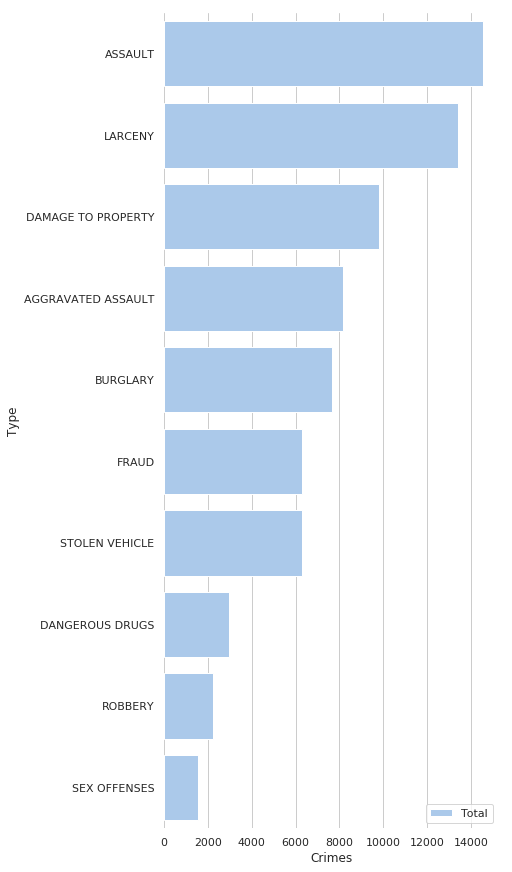

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="counts", y="Offense Category", data=crime_count.iloc[:10, :],
            label="Total", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",
       xlabel="Crimes")
sns.despine(left=True, bottom=True)

# Add a legend and informative axis label
plt.show()

In [9]:
crime_groups = dpd_crime.groupby(['Day of Week (Sunday is 1)'], as_index=True)

# size gives the number of crimes on each day.
print(crime_groups.size())

Day of Week (Sunday is 1)
1    11142
2    11916
3    11615
4    11589
5    11589
6    11854
7    11549
dtype: int64


In [10]:
crime_groups = dpd_crime.groupby(['Hour of Day'], as_index=True)

# size gives the number of crimes per each hour of the day.
print(crime_groups.size())

Hour of Day
0     5744
1     3270
2     2727
3     2431
4     1807
5     1596
6     1333
7     1627
8     2445
9     2907
10    3265
11    3250
12    4640
13    3514
14    3594
15    4084
16    4242
17    4261
18    4215
19    3916
20    4085
21    4138
22    4208
23    3955
dtype: int64


### Observation

From the data, crimes are distributed evenly though out the week with the highest concentration taking place around midnight. 



## Question how many crimes are committed throughout the day?

Text(0.5, 1.0, '% of Total Crimes by Offense Category')

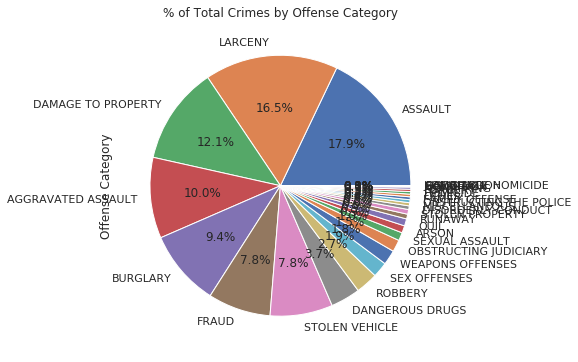

In [20]:
dpd_crime['Offense Category'].value_counts().plot(kind = 'pie',autopct='%1.1f%%',figsize=(6,6))
plt.title('% of Total Crimes by Offense Category')

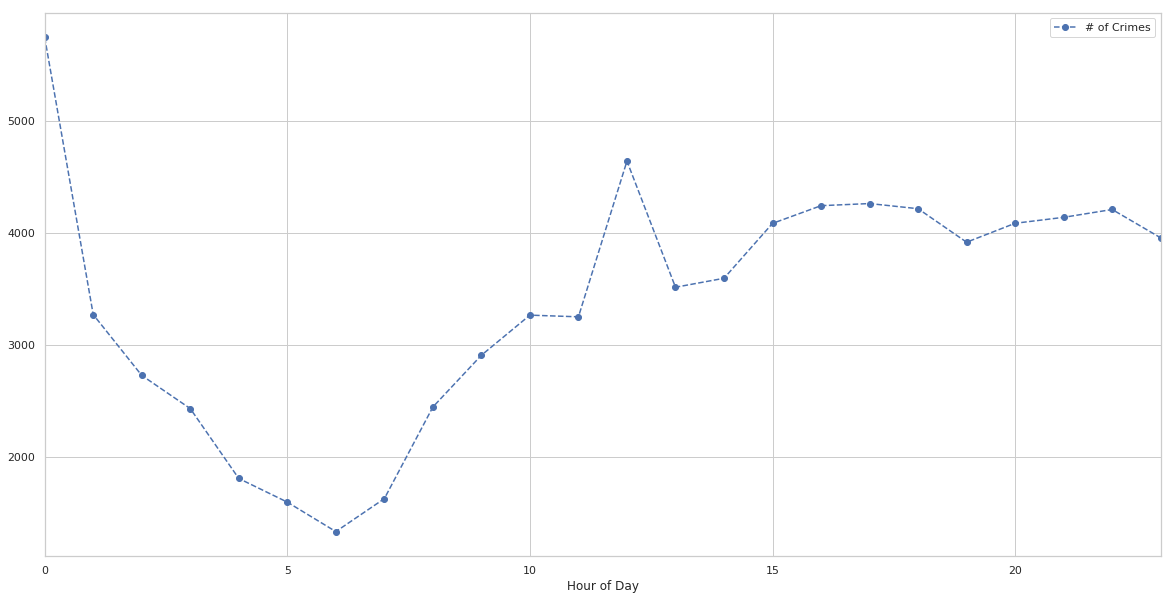

In [22]:
plot1 = dpd_crime.groupby('Hour of Day').size().reset_index(name='# of Crimes').set_index('Hour of Day')
plot1
plot1.plot(kind="line",figsize=(20,10), linestyle='--', marker='o')

### Plot Observation

As expected we see in the box plot an even distribution of crime taking taking thoughout the 24 hour cycle.

A Pie chart displays the same data next:

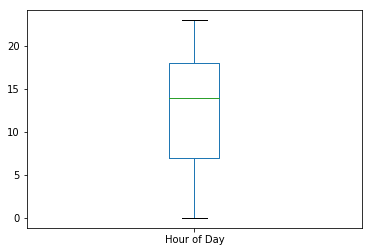

In [11]:
dpd_crime["Hour of Day"].plot.box();

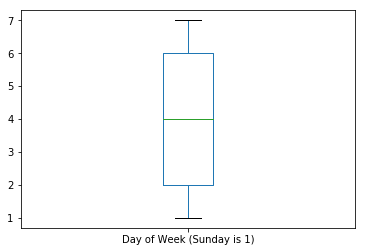

In [12]:
dpd_crime["Day of Week (Sunday is 1)"].plot.box();

### Question what is the correlation among data in the table?

The correlation indicates and confirms that there is little to no correlation exists between the variables.

In [13]:
dpd_crime.corr()

,Crime ID,Report #,State Offense Code,Incident Time (24h),Day of Week (Sunday is 1),Hour of Day,Council District,Longitude,Latitude,uniq,month
Crime ID,1.000000,0.301324,-0.024493,0.004613,-0.000865,0.004483,-0.006557,0.011412,0.015287,0.999406,0.976334
Report #,0.301324,1.000000,-0.002867,-0.004807,-0.000408,-0.004005,-0.005468,0.002791,0.008119,0.301816,0.247433
State Offense Code,-0.024493,-0.002867,1.000000,0.057179,0.011587,0.057327,0.007754,0.017848,-0.020047,-0.024844,-0.025752
Incident Time (24h),0.004613,-0.004807,0.057179,1.000000,0.019140,0.999651,0.011004,0.000830,-0.011536,0.004676,0.010448
Day of Week (Sunday is 1),-0.000865,-0.000408,0.011587,0.019140,1.000000,0.019249,0.006716,-0.004523,-0.009865,-0.001089,-0.002167
Hour of Day,0.004483,-0.004005,0.057327,0.999651,0.019249,1.000000,0.010473,0.000716,-0.011179,0.004548,0.009731
Council District,-0.006557,-0.005468,0.007754,0.011004,0.006716,0.010473,1.000000,0.168146,-0.726690,-0.006761,-0.003431
Longitude,0.011412,0.002791,0.017848,0.000830,-0.004523,0.000716,0.168146,1.000000,0.051098,0.011401,0.011637
Latitude,0.015287,0.008119,-0.020047,-0.011536,-0.009865,-0.011179,-0.726690,0.051098,1.000000,0.015466,0.012213
uniq,0.999406,0.301816,-0.024844,0.004676,-0.001089,0.004548,-0.006761,0.011401,0.015466,1.000000,0.975512


## Conclusion

An exploratory data analysis was performed using city of Detroit's Open Data Portal. The Crime Data for the city of Detroit was analyzed to determine if there was a relationship among crime in the city. 

- Significantly more crimes take place at night in particular concentrated around midnight.

- Crime is distributed evenly through out the week.

